In [154]:
import pandas as pd
from pylab import *
pd.set_option('display.max_rows',1000)
%matplotlib inline

In [155]:
# Load the datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [156]:
# First, store all the labels from the training set into a separate series and drop them from training data
train_labels = train['Survived']
train = train.drop('Survived', axis=1)
test_indices = test['PassengerId']

# Remove unnecessary variables from both test and training datasets
# Strictly speaking, "Cabin" is not unnecessary but there are so few 
# available data points that it is difficult to extrapolate what the 
# missing data values should be.
train = train.drop(['PassengerId','Cabin'], axis=1)
test = test.drop(['PassengerId','Cabin'], axis=1)

# Convert "sex" binary categorical variable to 0/1
train['Sex'] = train['Sex'].map({'male': 1, 'female': 0})
test['Sex'] = test['Sex'].map({'male': 1, 'female': 0})

In [157]:
# First, we will concatenate both training and test data to determine
# statistical age-related data about 1st, 2nd, and 3rd class passengers
full = pd.concat([train, test])

# Form dataframe of all entries with non-null ages from both train and test datasets
ages = pd.concat([full[full['Age'].notnull()]['Pclass'],full[full['Age'].notnull()]['Age']],axis=1)
ages.reset_index(drop=True)

,Pclass,Age
0,3,22.00
1,1,38.00
2,3,26.00
3,1,35.00
4,3,35.00
5,1,54.00
6,3,2.00
7,3,27.00
8,2,14.00
9,3,4.00


In [158]:
# Now, group the age-related data by passenger class
ages_1 = ages[ages['Pclass'] == 1]
ages_2 = ages[ages['Pclass'] == 2]
ages_3 = ages[ages['Pclass'] == 3]

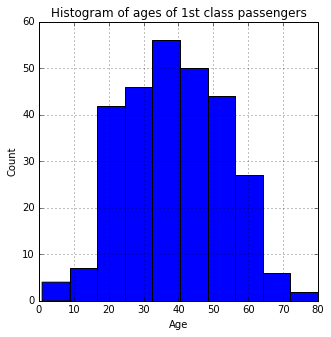

In [159]:
# Plot histogram of the ages of the 1st class passengers
ages_1['Age'].hist(figsize=(5,5))
xlabel('Age')
ylabel('Count')
title('Histogram of ages of 1st class passengers')
show()

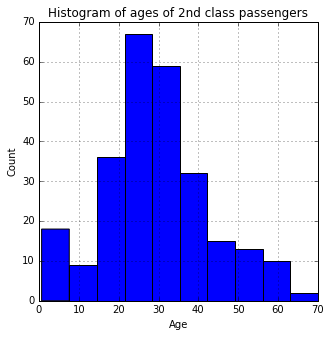

In [160]:
# Plot histogram of the ages of the 2nd class passengers
ages_2['Age'].hist(figsize=(5,5))
xlabel('Age')
ylabel('Count')
title('Histogram of ages of 2nd class passengers')
show()

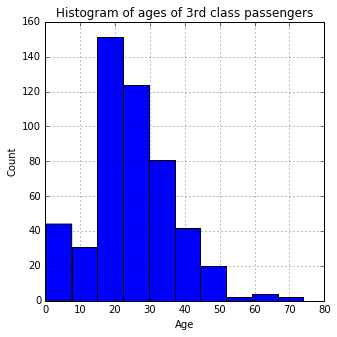

In [161]:
# Plot histogram of the ages of the 3rd class passengers
ages_3['Age'].hist(figsize=(5,5))
xlabel('Age')
ylabel('Count')
title('Histogram of ages of 3rd class passengers')
show()

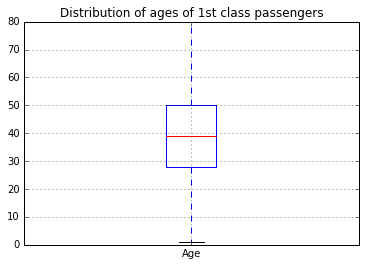

Mean = 39.15992957746479
Median = 39.0
Mode = 36.0


In [162]:
ages_1.boxplot(column='Age',return_type='dict')
title('Distribution of ages of 1st class passengers')
show()
print('Mean =', ages_1['Age'].mean())
print('Median =', ages_1['Age'].median())
print('Mode =', ages_1['Age'].mode().values[0])

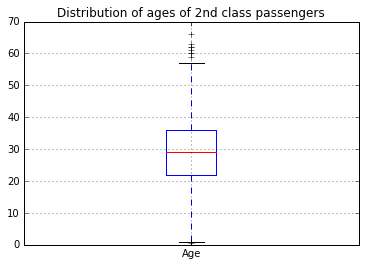

Mean = 29.506704980842912
Median = 29.0
Mode = 24.0


In [163]:
ages_2.boxplot(column='Age',return_type='dict')
title('Distribution of ages of 2nd class passengers')
show()
print('Mean =', ages_2['Age'].mean())
print('Median =', ages_2['Age'].median())
print('Mode =', ages_2['Age'].mode().values[0])

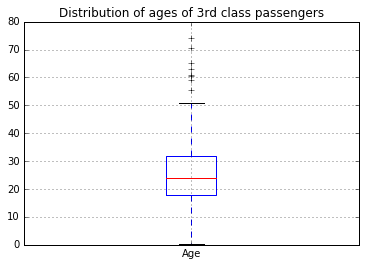

Mean = 24.81636726546906
Median = 24.0
Mode = 22.0


In [164]:
ages_3.boxplot(column='Age',return_type='dict')
title('Distribution of ages of 3rd class passengers')
show()
print('Mean =', ages_3['Age'].mean())
print('Median =', ages_3['Age'].median())
print('Mode =', ages_3['Age'].mode().values[0])

In [165]:
# We will choose the median age of each passenger class to fill in for any null age values in train dataset
for i in range(len(train.index)):
    if train.ix[[i]]['Pclass'].values[0] == 1 and isnan(train.ix[[i]]['Age'].values[0]):
        train.set_value(i,'Age',ages_1['Age'].median())
    elif train.ix[[i]]['Pclass'].values[0] == 2 and isnan(train.ix[[i]]['Age'].values[0]):
        train.set_value(i,'Age',ages_2['Age'].median())
    elif train.ix[[i]]['Pclass'].values[0] == 3 and isnan(train.ix[[i]]['Age'].values[0]):
        train.set_value(i,'Age',ages_3['Age'].median())

In [166]:
# Again, choose median age of each passenger class to fill for null age values in test dataset
for i in range(len(test.index)):
    if test.ix[[i]]['Pclass'].values[0] == 1 and isnan(test.ix[[i]]['Age'].values[0]):
        test.set_value(i,'Age',ages_1['Age'].median())
    elif test.ix[[i]]['Pclass'].values[0] == 2 and isnan(test.ix[[i]]['Age'].values[0]):
        test.set_value(i,'Age',ages_2['Age'].median())
    elif test.ix[[i]]['Pclass'].values[0] == 3 and isnan(test.ix[[i]]['Age'].values[0]):
        test.set_value(i,'Age',ages_3['Age'].median())

In [167]:
# Now we proceed to clean up ticket data to show only numeric data
# However, there are some entries in the train dataset that do not have any numeric data (see below)
train[train['Ticket'] == 'LINE']

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
179,3,"Leonard, Mr. Lionel",1,36.0,0,0,LINE,0.0,S
271,3,"Tornquist, Mr. William Henry",1,25.0,0,0,LINE,0.0,S
302,3,"Johnson, Mr. William Cahoone Jr",1,19.0,0,0,LINE,0.0,S
597,3,"Johnson, Mr. Alfred",1,49.0,0,0,LINE,0.0,S


In [168]:
# Let's first clean up the ticket column in the test dataset
test['Ticket'] = test['Ticket'].apply(lambda x: x.split(" ")[2] if len(x.split(" ")) == 3 else x)
test['Ticket'] = test['Ticket'].apply(lambda x: x.split(" ")[1] if len(x.split(" ")) == 2 else x)
test['Ticket'] = test['Ticket'].apply(lambda x: int(x))

In [169]:
# Now, let's proceed with the train dataset and map all "LINE" entries to -1
train['Ticket'] = train['Ticket'].apply(lambda x: x.split(" ")[2] if len(x.split(" ")) == 3 else x)
train['Ticket'] = train['Ticket'].apply(lambda x: x.split(" ")[1] if len(x.split(" ")) == 2 else x)
train['Ticket'] = train['Ticket'].apply(lambda x: int(x) if x[0].isnumeric() else -1)

In [170]:
# The entries that contained "LINE" are all in 3rd class, so let's plot a histogram 
# and box and whisker plot to determine what is the typical ticket and fare for those people
ticket_3 = train[(train['Pclass'] == 3) & (train['Ticket'] > 0)]

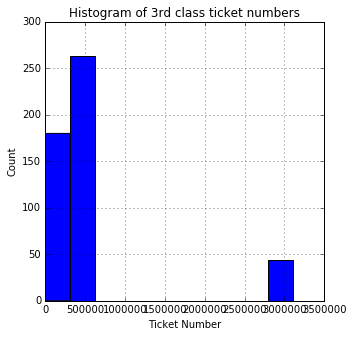

In [171]:
# Histogram of ticket numbers
ticket_3['Ticket'].hist(figsize=(5,5))
xlabel('Ticket Number')
ylabel('Count')
title('Histogram of 3rd class ticket numbers')
show()

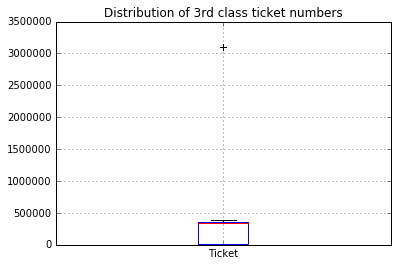

Mean = 474654.6755646817
Median = 347061.0
Mode = 1601


In [172]:
# Box and whisker plot of ticket numbers
ticket_3.boxplot(column='Ticket',return_type='dict')
title('Distribution of 3rd class ticket numbers')
show()
print('Mean =', ticket_3['Ticket'].mean())
print('Median =', ticket_3['Ticket'].median())
print('Mode =', ticket_3['Ticket'].mode().values[0])

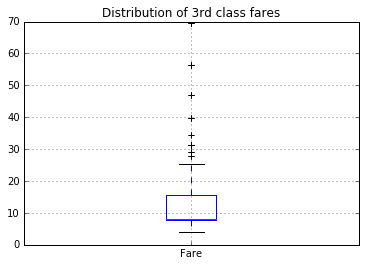

Mean = 13.787874948665301
Median = 8.05
Mode = 8.05


In [173]:
# Box and whisker plot of corresponding fares
ticket_3.boxplot(column='Fare',return_type='dict')
title('Distribution of 3rd class fares')
show()
print('Mean =', ticket_3['Fare'].mean())
print('Median =', ticket_3['Fare'].median())
print('Mode =', ticket_3['Fare'].mode().values[0])

In [174]:
# We will replace the ticket numbers and fares for each "LINE" entry with
# the median values from the above series
for i in range(len(train.index)):
    if train.ix[[i]]['Ticket'].values[0] == -1:
        train.set_value(i,'Ticket',ticket_3['Ticket'].median())
        train.set_value(i,'Fare',ticket_3['Fare'].median())

In [175]:
# There is one missing fare value in the test dataset for one of the 3rd class
# passengers. We use the median 3rd class fare to fill in the value.
test.set_value(152,'Fare',ticket_3['Fare'].median())

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,"Kelly, Mr. James",1,34.50,0,0,330911,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.00,1,0,363272,7.0000,S
2,2,"Myles, Mr. Thomas Francis",1,62.00,0,0,240276,9.6875,Q
3,3,"Wirz, Mr. Albert",1,27.00,0,0,315154,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.00,1,1,3101298,12.2875,S
5,3,"Svensson, Mr. Johan Cervin",1,14.00,0,0,7538,9.2250,S
6,3,"Connolly, Miss. Kate",0,30.00,0,0,330972,7.6292,Q
7,2,"Caldwell, Mr. Albert Francis",1,26.00,1,1,248738,29.0000,S
8,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,18.00,0,0,2657,7.2292,C
9,3,"Davies, Mr. John Samuel",1,21.00,2,0,48871,24.1500,S


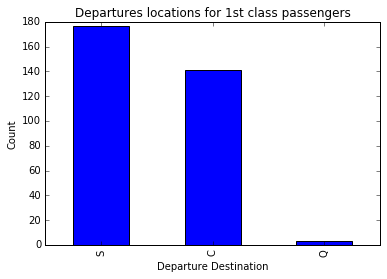

In [176]:
# The final task is to fill in missing values for the "Embarked" categorical variable.
# We will do this by investigating the departure locations for 1st, 2nd, and 3rd class passengers
full[(pd.notnull(full['Embarked'])) & (full['Pclass'] == 1)]['Embarked'].value_counts().plot(kind='bar')
xlabel('Departure Destination')
ylabel('Count')
title('Departures locations for 1st class passengers')
show()

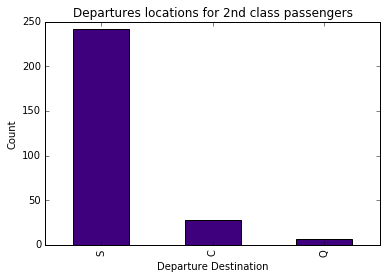

In [177]:
# Second class passenger departure destinations
full[(pd.notnull(full['Embarked'])) & (full['Pclass'] == 2)]['Embarked'].value_counts().plot(kind='bar', colormap='Purples_r')
xlabel('Departure Destination')
ylabel('Count')
title('Departures locations for 2nd class passengers')
show()

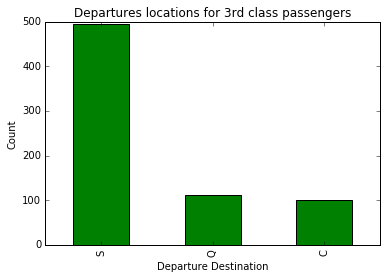

In [178]:
# Third class passenger departure destinations
full[(pd.notnull(full['Embarked'])) & (full['Pclass'] == 3)]['Embarked'].value_counts().plot(kind='bar', colormap='ocean')
xlabel('Departure Destination')
ylabel('Count')
title('Departures locations for 3rd class passengers')
show()

In [179]:
# Notice that the entries with missing "Embarked" values are all in first class
full[pd.isnull(full['Embarked'])]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,1,"Icard, Miss. Amelie",0,38.0,0,0,113572,80.0,NaN
829,1,"Stone, Mrs. George Nelson (Martha Evelyn)",0,62.0,0,0,113572,80.0,NaN


In [180]:
# We will generate a random "Embarked" value according to the 1st class departure distribution above
randEmbarked = full[(pd.notnull(full['Embarked'])) & (full['Pclass'] == 1)]['Embarked'].sample(n=2).values
print(randEmbarked)

['S' 'C']


In [181]:
# Set the null "Embarked" values to the randomly chosen ones above
train.set_value(61,'Embarked',randEmbarked[0])
train.set_value(829,'Embarked',randEmbarked[1])

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,"Braund, Mr. Owen Harris",1,22.00,1,0,21171,7.2500,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.00,1,0,17599,71.2833,C
2,3,"Heikkinen, Miss. Laina",0,26.00,0,0,3101282,7.9250,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.00,1,0,113803,53.1000,S
4,3,"Allen, Mr. William Henry",1,35.00,0,0,373450,8.0500,S
5,3,"Moran, Mr. James",1,24.00,0,0,330877,8.4583,Q
6,1,"McCarthy, Mr. Timothy J",1,54.00,0,0,17463,51.8625,S
7,3,"Palsson, Master. Gosta Leonard",1,2.00,3,1,349909,21.0750,S
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.00,0,2,347742,11.1333,S
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.00,1,0,237736,30.0708,C


In [182]:
# One-hot encode the "Embarked" categorical variable
# Train dataset
EmbarkedOneHot_train = pd.get_dummies(train['Embarked'])
train = train.drop('Embarked', axis=1)
train = pd.concat([train, EmbarkedOneHot_train], axis=1)
# Test dataset
EmbarkedOneHot_test = pd.get_dummies(test['Embarked'])
test = test.drop('Embarked',axis=1)
test = pd.concat([test, EmbarkedOneHot_test], axis=1)

In [265]:
# Finally, let us extract a useful feature from the "Name" variable
# This useful feature will be the title ("Mr.", "Mrs.", etc.) of the person.
# This will yield a categorical variable that can be one-hot encoded.

# Extract only the title of each passenger
train['Name'] = train['Name'].apply(lambda x: x.split(",")[1])
train['Name'] = train['Name'].apply(lambda x: x.split(".")[0])
train['Name'] = train['Name'].apply(lambda x: x.split(" ")[2] if len(x.split(" ")) > 2 else x)

# Examine the number of each title
train['Name'].value_counts()

 Mr          517
 Miss        182
 Mrs         125
 Master       40
 Dr            7
 Rev           6
 Col           2
 Major         2
 Mlle          2
 Don           1
 Lady          1
 Jonkheer      1
Countess       1
 Mme           1
 Ms            1
 Sir           1
 Capt          1
Name: Name, dtype: int64

In [266]:
# We will map all equivalent "Miss" titles together and we will lump all rare titles into label "Rare"
train['Name'] = train['Name'].replace(['Mme','Ms','Mlle'],['Miss','Miss','Miss'],regex=True)
rare_titles = ['Dr','Rev','Col','Major','Sir','Countess','Lady','Jonkheer','Don','Capt']
rare = ['Rare','Rare','Rare','Rare','Rare',' Rare','Rare','Rare','Rare','Rare']
train['Name'] = train['Name'].replace(rare_titles,rare,regex=True)
train['Name'].value_counts()

 Mr        517
 Miss      186
 Mrs       125
 Master     40
 Rare       23
Name: Name, dtype: int64

In [268]:
# One-hot encode the "Name" categorical variable
NameOneHot_train = pd.get_dummies(train['Name'])
train = train.drop('Name', axis=1)
train = pd.concat([train, NameOneHot_train], axis=1)

In [272]:
# Perform the same "Name" modifications to the test dataset
# Extract only the title of each passenger
test['Name'] = test['Name'].apply(lambda x: x.split(",")[1])
test['Name'] = test['Name'].apply(lambda x: x.split(".")[0])
test['Name'] = test['Name'].apply(lambda x: x.split(" ")[2] if len(x.split(" ")) > 2 else x)

# Examine the number of each title
test['Name'].value_counts()

 Mr        240
 Miss       78
 Mrs        72
 Master     21
 Col         2
 Rev         2
 Ms          1
 Dr          1
 Dona        1
Name: Name, dtype: int64

In [273]:
# We will map all equivalent "Miss" titles together and we will lump all rare titles into label "Rare"
test['Name'] = test['Name'].replace(['Ms'],['Miss'],regex=True)
rare_titles = ['Dr','Dona','Col','Rev']
rare = ['Rare','Rare','Rare','Rare']
test['Name'] = test['Name'].replace(rare_titles,rare,regex=True)
test['Name'].value_counts()

 Mr        240
 Miss       79
 Mrs        72
 Master     21
 Rare        6
Name: Name, dtype: int64

In [274]:
# One-hot encode the "Name" categorical variable in the test dataset
NameOneHot_test = pd.get_dummies(test['Name'])
test = test.drop('Name', axis=1)
test = pd.concat([test, NameOneHot_test], axis=1)

In [295]:
# Both datasets have been wrangled and cleaned. They are ready to be fed into
# a machine learning algorithm to determine test data survivorship. We will use
# logistic regression because this is a classification problem (survive or die)

## Split Training Data
from sklearn.cross_validation import train_test_split

num_test = 0.1  # Use 10% for cross-validation
X_train, X_test, y_train, y_test = train_test_split(train, train_labels, test_size=num_test, random_state=24)

# Apply logistic regression
from sklearn import linear_model
logreg = linear_model.LogisticRegression(C=1,penalty='l1')
logreg.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [296]:
# Visualize actual and predicted survivorship from logistic model
actual = pd.DataFrame(y_test)
actual_indices = actual.index.values
predicted = pd.DataFrame(logreg.predict(X_test),columns=['Survived (Pred)'])
predicted = predicted.set_index(actual_indices)
cmpActPred = pd.concat([actual,predicted],axis=1)
cmpActPred

,Survived,Survived (Pred)
169,0,0
556,1,0
206,0,0
71,0,0
677,1,1
839,1,0
835,1,1
261,1,0
179,0,0
282,0,0


In [297]:
# Compute ROC area under curve (AOC)
from sklearn.metrics import accuracy_score, roc_auc_score
preds = logreg.predict(X_test)
score = roc_auc_score(y_test, preds)
print("Area under ROC {0}".format(score))

Area under ROC 0.8500797448165869


In [298]:
# Test Set Predictions
test_preds = logreg.predict(test)

# Format for submission
output = pd.DataFrame({ 'PassengerId' : test_indices, 'Survived': test_preds })
output.head()
output.to_csv('logisticRegPred.csv', index = False)

In [299]:
# Let's repeat the above steps using a random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
clf = RandomForestClassifier(n_estimators=2000, n_jobs=-1)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [300]:
# Visualize actual and predicted survivorship from random forest model
predictedRF = pd.DataFrame(clf.predict(X_test),columns=['Survived (Pred)'])
predictedRF = predictedRF.set_index(actual_indices)
cmpActPredRF = pd.concat([actual,predictedRF],axis=1)
cmpActPredRF

,Survived,Survived (Pred)
169,0,1
556,1,1
206,0,0
71,0,0
677,1,0
839,1,0
835,1,1
261,1,0
179,0,0
282,0,0


In [301]:
# Random forest training Predictions
preds = clf.predict(X_test)
score = roc_auc_score(y_test, preds)
print("Area under ROC {0}".format(score))

Area under ROC 0.8740031897926636


In [302]:
# Test Set Predictions
test_preds = clf.predict(test)

# Format for submission
output = pd.DataFrame({ 'PassengerId' : test_indices, 'Survived': test_preds })
output.to_csv('randomForestPred.csv', index = False)